# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  Within the latitude vs hemisphere graphs for North and South (Max Temp vs. Latitude Linear Regression), there is a strong correlation to tempature and the latitude. This means we can accuratly say that there is a relationship between how far you are to the equator (point 0) and how hot it will be. We can do a pretty accurate estimate of how hot it will be based on the latitude of the area. 
2.  Windiness and Cloudiness have weak r values (less than +5 or -5). This indicates that latitude can not predict how windy or cloudy it will be. 
3. Northern Hemisphere is a negative r value while South is positive. This lets us know that that farther away from the baseline of 0 you go on each Hemishpere, we will experience colder values. This makes sense considering the equator (or point zero) is the hottest. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 27.9116, 'lat': -33.0153},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 16.94,
  'feels_like': 16.44,
  'temp_min': 16.94,
  'temp_max': 16.94,
  'pressure': 1027,
  'humidity': 67,
  'sea_level': 1027,
  'grnd_level': 1022},
 'visibility': 10000,
 'wind': {'speed': 7.72, 'deg': 188, 'gust': 8.79},
 'clouds': {'all': 100},
 'dt': 1650050650,
 'sys': {'country': 'ZA', 'sunrise': 1649996985, 'sunset': 1650037602},
 'timezone': 7200,
 'id': 1006984,
 'name': 'East London',
 'cod': 200}

In [5]:
#begin loop by creating lists to hold elements
temp = []
name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#create a start place for the cities
start = 1

In [6]:
#loop through all the cities in the list
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_unique = response["name"]
        temp.append(response["main"]["temp"])
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {start} | {city_unique}")
    #Increase by 1 each time
        start +=1
        
    except: 
        print("Not Found. Skip.")
    continue

Processing Record 1 | Yumen
Processing Record 2 | Lata
Processing Record 3 | Vaini
Processing Record 4 | Qaanaaq
Processing Record 5 | Nome
Processing Record 6 | Rikitea
Processing Record 7 | New Norfolk
Processing Record 8 | Hong Kong
Processing Record 9 | Yatou
Processing Record 10 | Thompson
Processing Record 11 | Bluff
Processing Record 12 | Hobart
Processing Record 13 | Port Alfred
Processing Record 14 | Tuktoyaktuk
Not Found. Skip.
Processing Record 15 | Qiongshan
Processing Record 16 | Hilo
Processing Record 17 | Ha Giang
Processing Record 18 | Orël-Izumrud
Processing Record 19 | Coquimbo
Processing Record 20 | Kununurra
Processing Record 21 | Saint-Pierre
Not Found. Skip.
Processing Record 22 | Albany
Processing Record 23 | Bredasdorp
Processing Record 24 | Busselton
Processing Record 25 | Nānākuli
Processing Record 26 | Kieta
Processing Record 27 | Torbay
Processing Record 28 | Mataura
Processing Record 29 | Avarua
Not Found. Skip.
Processing Record 30 | Bengkulu
Processing Re

Processing Record 237 | Aswān
Not Found. Skip.
Processing Record 238 | Margate
Processing Record 239 | Saldanha
Processing Record 240 | Alofi
Not Found. Skip.
Processing Record 241 | Le Port
Processing Record 242 | Niltepec
Not Found. Skip.
Processing Record 243 | Dingle
Processing Record 244 | Mossamedes
Processing Record 245 | Fortuna
Processing Record 246 | Gannan
Processing Record 247 | Belyy Yar
Processing Record 248 | Cotonou
Processing Record 249 | Zaraza
Processing Record 250 | Lüderitz
Processing Record 251 | Sørland
Processing Record 252 | Tsaratanana
Processing Record 253 | Sompeta
Processing Record 254 | Sangar
Processing Record 255 | Salta
Processing Record 256 | San Roque
Processing Record 257 | Bukene
Processing Record 258 | Cayenne
Not Found. Skip.
Processing Record 259 | Ostrovnoy
Processing Record 260 | Imeni Poliny Osipenko
Processing Record 261 | Noumea
Processing Record 262 | Faanui
Processing Record 263 | Vila Velha
Processing Record 264 | Goālpāra
Processing Reco

Processing Record 470 | Kamaishi
Processing Record 471 | Egvekinot
Processing Record 472 | Rexburg
Processing Record 473 | Sobolevo
Processing Record 474 | Poço Verde
Processing Record 475 | Madang
Processing Record 476 | Dunedin
Processing Record 477 | Sechura
Not Found. Skip.
Not Found. Skip.
Processing Record 478 | Kitob
Processing Record 479 | Non Sung
Processing Record 480 | Raudeberg
Processing Record 481 | Qaqortoq
Processing Record 482 | Flinders
Processing Record 483 | Lagunas
Processing Record 484 | Roald
Processing Record 485 | Agadez
Processing Record 486 | Tessenderlo
Processing Record 487 | Nānpāra
Processing Record 488 | Flin Flon
Processing Record 489 | Orda
Processing Record 490 | Mapimí
Processing Record 491 | Zyryanka
Processing Record 492 | Bad Laasphe
Processing Record 493 | Rome
Processing Record 494 | Alpena
Processing Record 495 | North Potomac
Processing Record 496 | Fort Nelson
Not Found. Skip.
Processing Record 497 | Inawayan
Processing Record 498 | Tomboucto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#create df with the imported data from api
weather_dict = {
    "city": name,
    "temp": temp,
    "lat": lat,
    "lng": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data2 = pd.DataFrame(weather_dict)


In [8]:
weather_data2.head()

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,5.03,40.2833,97.2000,5.03,23,100,7.92,CN,1650050654
1,Lata,15.45,40.1629,-8.3327,15.45,76,100,1.52,PT,1650050654
2,Vaini,25.09,-21.2000,-175.2000,25.09,88,20,2.06,TO,1650050655
3,Qaanaaq,-18.42,77.4840,-69.3632,-18.42,89,100,2.41,GL,1650050655
4,Nome,2.04,64.5011,-165.4064,2.04,69,100,9.77,US,1650050656


In [9]:
# drop skipped cities
weather_data = weather_data2.dropna(how="any")
#print(weather_data.count())

# create a csv file
weather_data.to_csv("weather.csv", index=False)

# show the df
weather_read = pd.read_csv("weather.csv")
weather_read

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,5.03,40.2833,97.2000,5.03,23,100,7.92,CN,1650050654
1,Lata,15.45,40.1629,-8.3327,15.45,76,100,1.52,PT,1650050654
2,Vaini,25.09,-21.2000,-175.2000,25.09,88,20,2.06,TO,1650050655
3,Qaanaaq,-18.42,77.4840,-69.3632,-18.42,89,100,2.41,GL,1650050655
4,Nome,2.04,64.5011,-165.4064,2.04,69,100,9.77,US,1650050656
...,...,...,...,...,...,...,...,...,...,...
553,Mīnāb,27.18,27.1467,57.0801,27.18,39,100,1.03,IR,1650050882
554,Baykit,1.47,61.6700,96.3700,1.47,99,100,1.07,RU,1650050883
555,Bathsheba,29.34,13.2167,-59.5167,29.34,65,20,9.77,BB,1650050883
556,Shīeli,20.78,44.1667,66.7500,20.78,14,34,3.32,KZ,1650050883


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
humidity_city = weather_data.loc[weather_data["Humidity"] > 100 ]   
humid_city = humidity_city["city"].value_counts()
hum_city = len(humid_city)
humidity_city.head(5)

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
print(hum_city)

0


In [12]:
no_humidity = weather_data.loc[weather_data["Humidity"] <= 100 ]   
no_humid = no_humidity["city"].value_counts()
no_hum = len(no_humid)
no_hum

557

Note: No values are over 100 in humidity as shown by the examples above.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

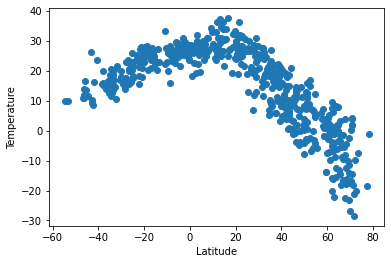

In [13]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

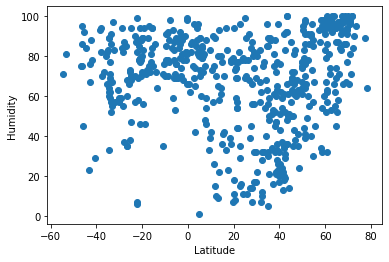

In [14]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

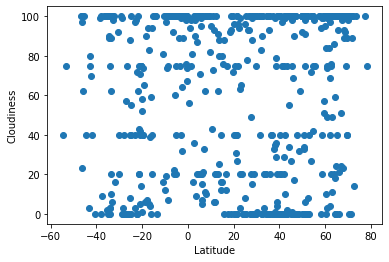

In [15]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

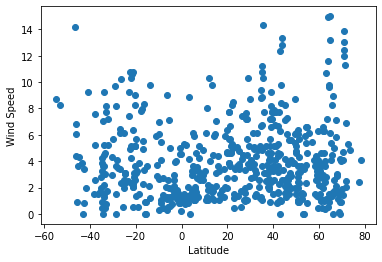

In [16]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
#find all the cities in the north hem (where lat is above 0)
north_hem = weather_data.loc[weather_data["lat"] > 0 ] 
north_hem

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,5.03,40.2833,97.2000,5.03,23,100,7.92,CN,1650050654
1,Lata,15.45,40.1629,-8.3327,15.45,76,100,1.52,PT,1650050654
3,Qaanaaq,-18.42,77.4840,-69.3632,-18.42,89,100,2.41,GL,1650050655
4,Nome,2.04,64.5011,-165.4064,2.04,69,100,9.77,US,1650050656
7,Hong Kong,22.22,22.2855,114.1577,22.40,82,94,8.49,HK,1650050476
...,...,...,...,...,...,...,...,...,...,...
553,Mīnāb,27.18,27.1467,57.0801,27.18,39,100,1.03,IR,1650050882
554,Baykit,1.47,61.6700,96.3700,1.47,99,100,1.07,RU,1650050883
555,Bathsheba,29.34,13.2167,-59.5167,29.34,65,20,9.77,BB,1650050883
556,Shīeli,20.78,44.1667,66.7500,20.78,14,34,3.32,KZ,1650050883


In [18]:
south_hem = weather_data.loc[weather_data["lat"] < 0 ] 
south_hem

,city,temp,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Vaini,25.09,-21.2000,-175.2000,25.09,88,20,2.06,TO,1650050655
5,Rikitea,25.34,-23.1203,-134.9692,25.34,70,3,7.44,PF,1650050656
6,New Norfolk,9.20,-42.7826,147.0587,9.84,67,80,0.83,AU,1650050657
10,Bluff,11.00,-46.6000,168.3333,11.00,75,100,14.19,NZ,1650050658
11,Hobart,10.25,-42.8794,147.3294,10.59,76,75,0.00,AU,1650050417
...,...,...,...,...,...,...,...,...,...,...
535,Calama,21.27,-22.4667,-68.9333,21.27,7,0,10.80,CL,1650050876
536,Nelson Bay,14.70,-32.7167,152.1500,15.56,97,98,1.72,AU,1650050876
542,Poso,24.94,-1.3959,120.7524,24.94,90,100,1.61,ID,1650050879
547,Hanmer Springs,8.57,-42.5167,172.8167,8.57,88,70,3.43,NZ,1650050880


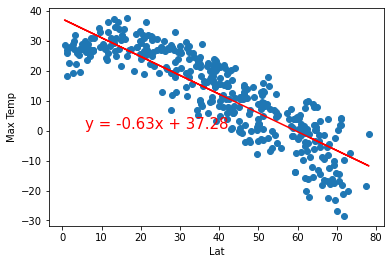

The r-value is: -0.8677732515751507


In [19]:
x_values = north_hem["lat"]
y_values = north_hem["Max Temp"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

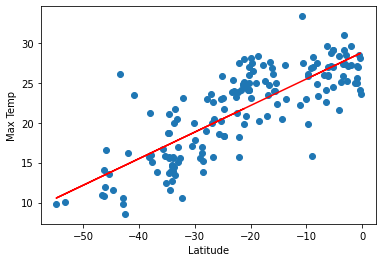

The r-value is: 0.8020600783831383


In [20]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_south_temp = south_hem["Max Temp"]
x_south_lat = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_temp)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_lat, y_south_temp)
plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

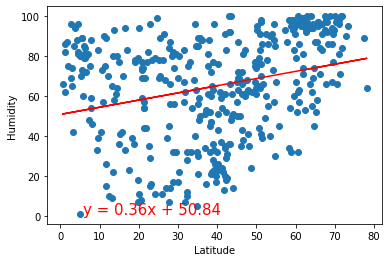

The r-value is: 0.2774733813076385


In [21]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_hum = north_hem["Humidity"]
x_lat = north_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_lat,y_hum)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

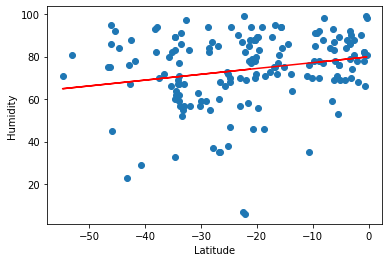

The r-value is: 0.21338051673938585


In [22]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_hum_south = south_hem["Humidity"]
x_south_lat = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_hum_south)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_lat,y_hum_south)
plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

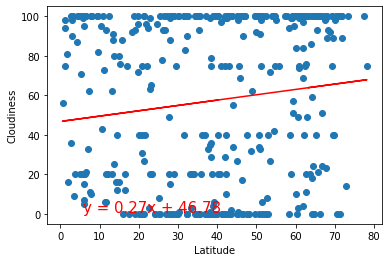

The r-value is: 0.12974231955278098


In [23]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_cloud = north_hem["Cloudiness"]
x_lat_c = north_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_c, y_cloud)
regress_values = x_lat_c * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_lat_c,y_cloud)
plt.plot(x_lat_c,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

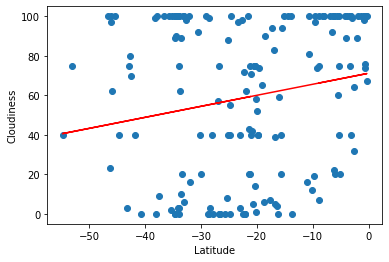

The r-value is: 0.19145110441841787


In [24]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_c_south = south_hem["Cloudiness"]
x_south_c = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_c, y_c_south)
regress_values = x_south_c * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_c,y_c_south)
plt.plot(x_south_c,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

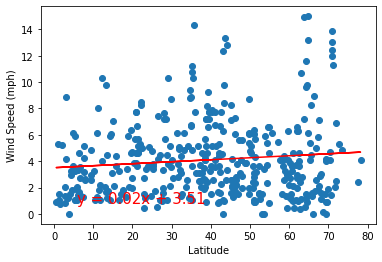

The r-value is: 0.10411534679367578


In [25]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_wind = north_hem["Wind Speed"]
x_lat_w = north_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_w, y_wind)
regress_values = x_lat_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_lat_w,y_wind)
plt.plot(x_lat_w,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

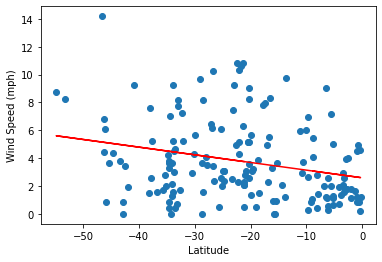

The r-value is: -0.25465861147187324


In [26]:
#create the x and create the y values using the above dataframe. weight and average tumor volume will be x and y values.
y_w_south = south_hem["Wind Speed"]
x_south_w = south_hem["lat"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_w, y_w_south)
regress_values = x_south_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_south_w,y_w_south)
plt.plot(x_south_w,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print(f"The r-value is: {rvalue}")